<a href="https://colab.research.google.com/github/shoreey/Predicting-psychosis-vs-healthy-brain-with-computer-vision/blob/main/Psychosis_vs_healthy_Brain_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
BASE_DIR="E:\Dataset\Data"
TRAIN_IMAGES_DIR=os.path.join(BASE_DIR,'train_images')

data_df=pd.read_excel("E:\Classification_clean.xlsx")
data_df["Class"]=data_df["Diagnosis"]>0
#data_df["Class"].replace(True,2,inplace=True)
#data_df["Class"].replace(False,1,inplace=True)
data_df.Class = data_df.Class.astype('int')


data_df.head()

,ID_CF,Partition,FirstEpisodes_FEP__HealthyControl_HC_,Diagnosis,Gender,Age,Site 1,Site 2,Site 3,Site 4,Site 5,Site 6,Site 7,Euler,Class
0,CF_001,4,FEP,3,0,23.857632,0,0,0,0,0,0,0,-21,1
1,CF_002,5,FEP,3,0,28.952772,0,0,0,0,0,0,0,-33,1
2,CF_003,7,FEP,1,0,20.199863,0,0,0,0,0,0,0,-55,1
3,CF_004,6,FEP,1,0,28.517454,0,0,0,0,0,0,0,-26,1
4,CF_005,8,FEP,2,1,39.101985,0,0,0,0,0,0,0,-24,1


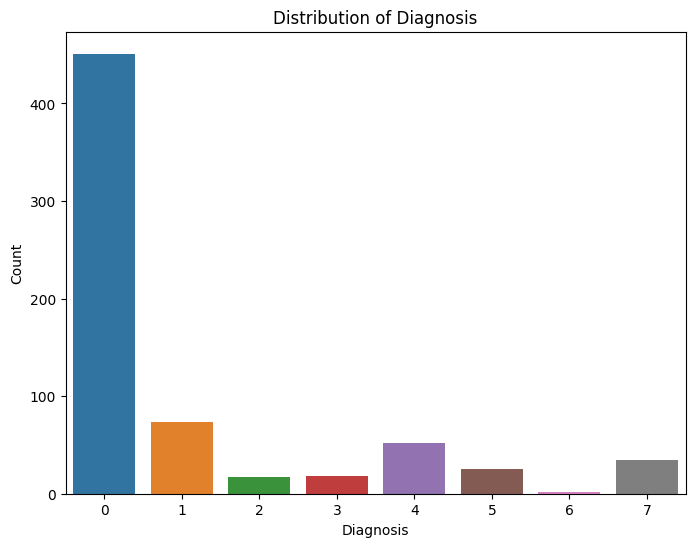

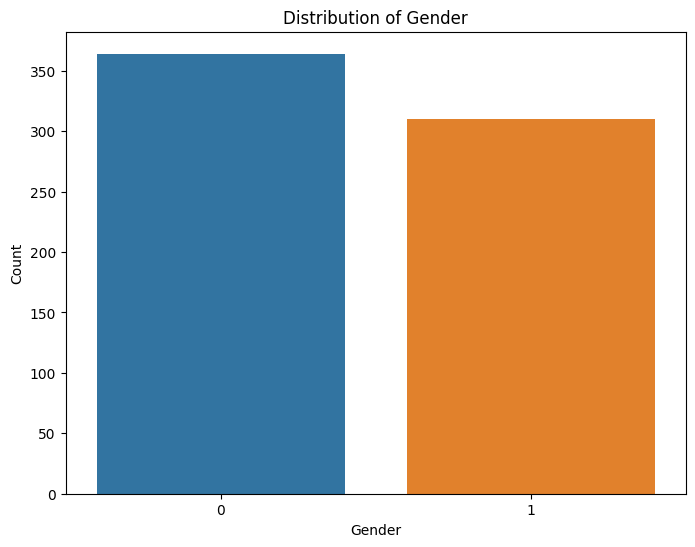

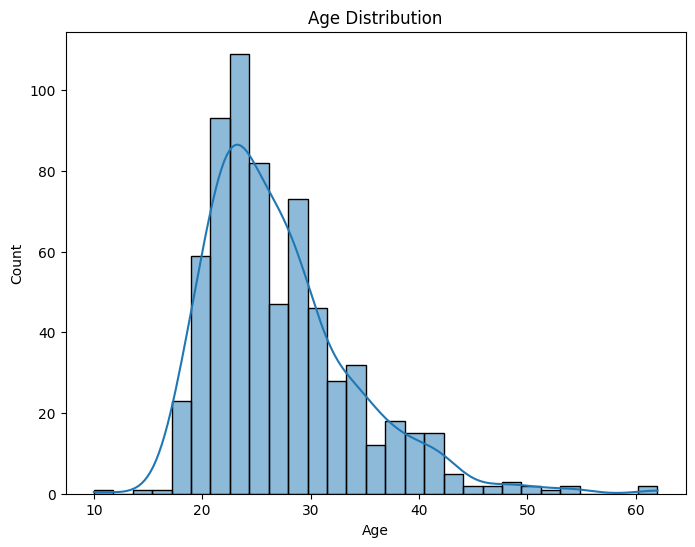

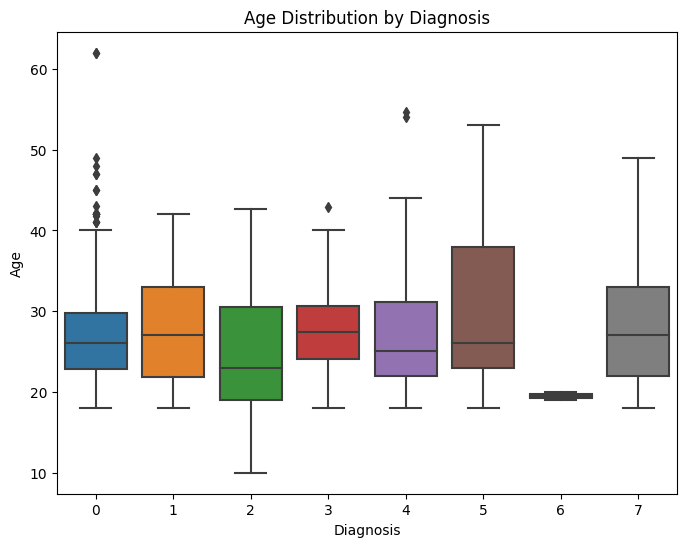

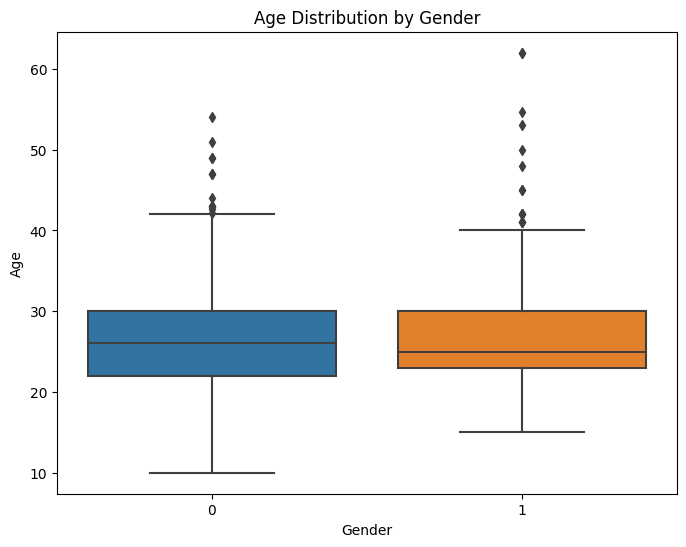

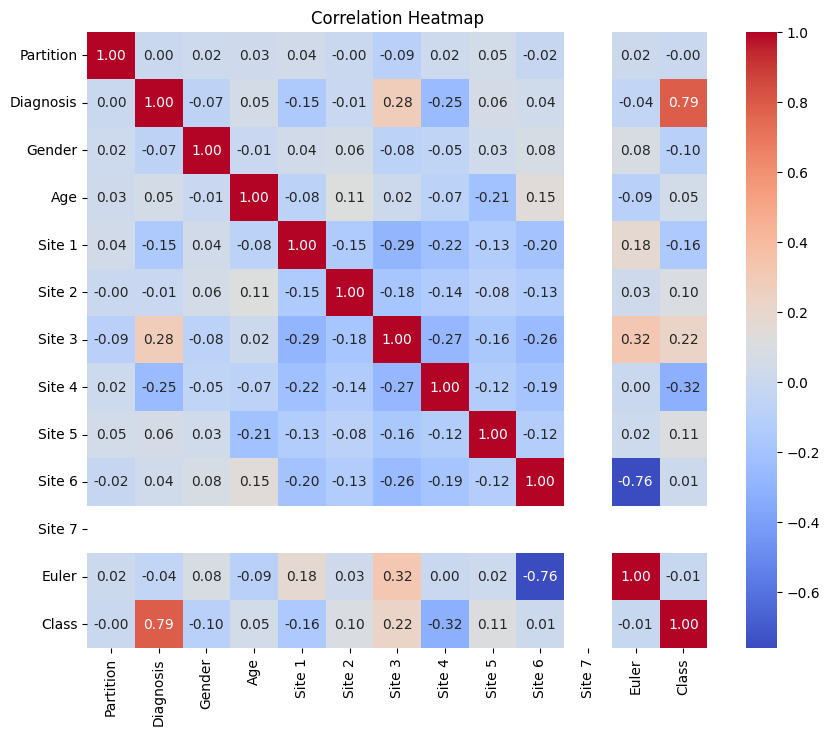

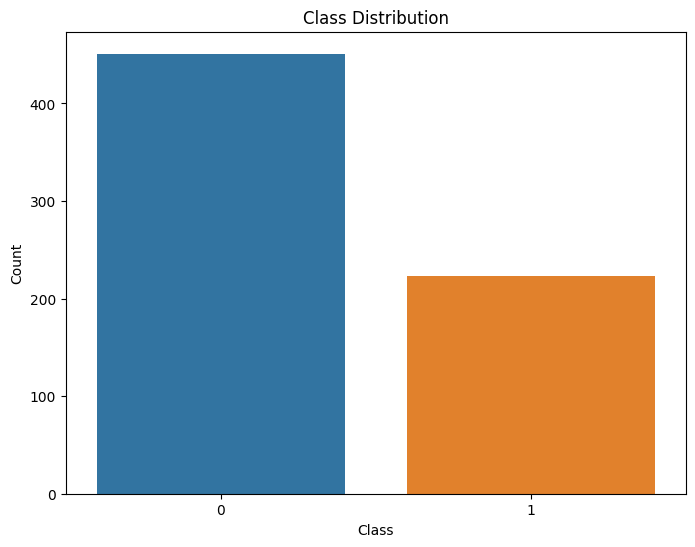

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Distribution of Diagnosis (FEP vs Healthy Control)
plt.figure(figsize=(8, 6))
sns.countplot(data=data_df, x='Diagnosis')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Plot 2: Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data_df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plot 3: Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data_df, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot 4: Box plot of Age grouped by Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_df, x='Diagnosis', y='Age')
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.show()

# Plot 5: Box plot of Age grouped by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_df, x='Gender', y='Age')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Exclude non-numeric columns
numeric_data_df = data_df.select_dtypes(include=['number'])

# Plot 6: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data_df, x='Class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()




Diagnosis Distribution:
Diagnosis
0    451
1     74
4     52
7     35
5     25
3     18
2     17
6      2
Name: count, dtype: int64



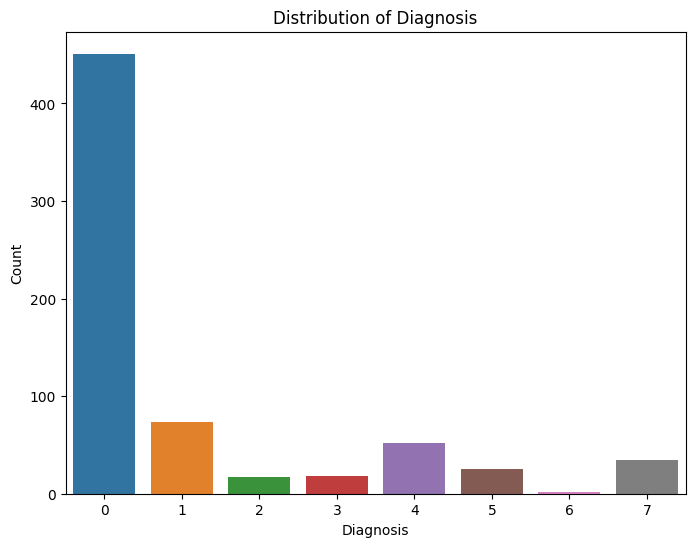

Gender Distribution:
Gender
0    364
1    310
Name: count, dtype: int64



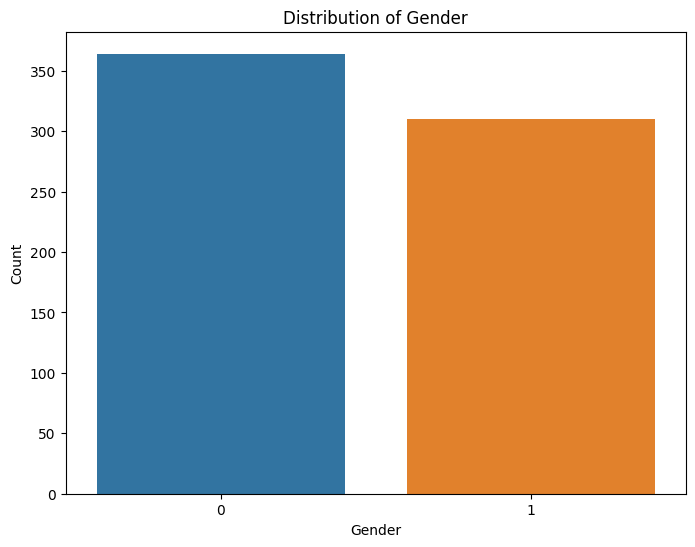

Age Distribution Summary:
count    674.000000
mean      27.138008
std        6.868340
min       10.000000
25%       22.000000
50%       26.000000
75%       30.000000
max       62.000000
Name: Age, dtype: float64



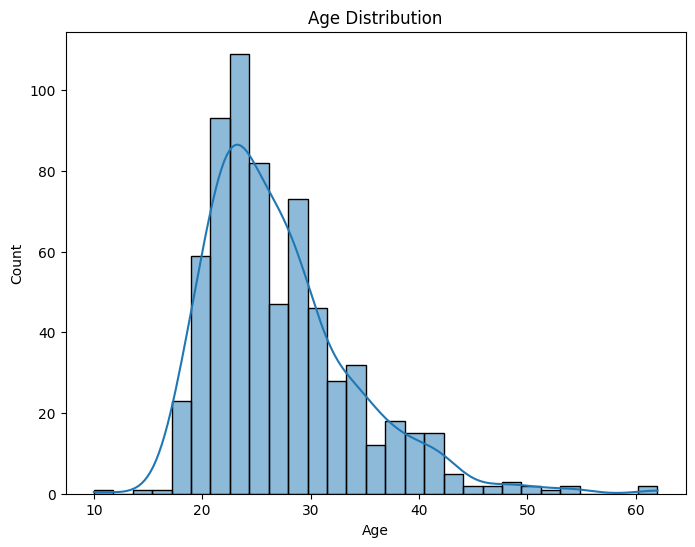

Class Distribution:
Class
0    451
1    223
Name: count, dtype: int64



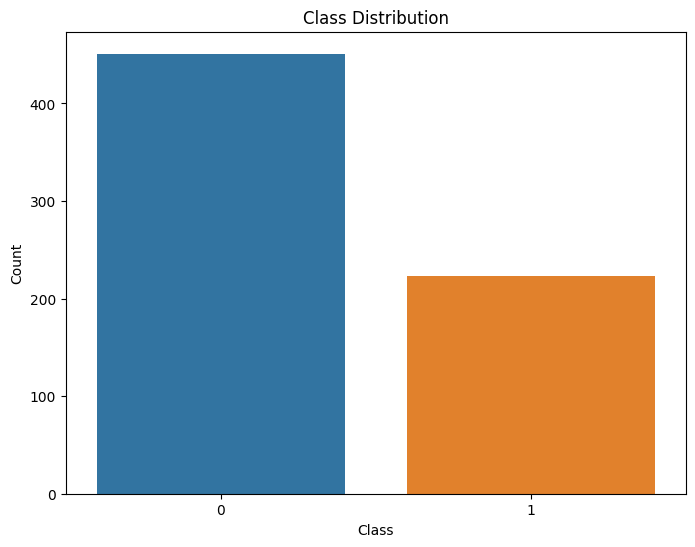

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Print the count of Diagnosis
print("Diagnosis Distribution:")
print(data_df['Diagnosis'].value_counts())
print()

# Plot 1: Distribution of Diagnosis (FEP vs Healthy Control)
plt.figure(figsize=(8, 6))
sns.countplot(data=data_df, x='Diagnosis')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Print the count of Gender
print("Gender Distribution:")
print(data_df['Gender'].value_counts())
print()

# Plot 2: Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data_df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Print the age distribution summary
print("Age Distribution Summary:")
print(data_df['Age'].describe())
print()

# Plot 3: Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data_df, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Print the class distribution
print("Class Distribution:")
print(data_df['Class'].value_counts())
print()

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data_df, x='Class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Correlation Matrix:
                                           Partition  Diagnosis    Gender  \
Partition                                   1.000000   0.002044  0.019381   
Diagnosis                                   0.002044   1.000000 -0.065150   
Gender                                      0.019381  -0.065150  1.000000   
Age                                         0.027589   0.052768 -0.005016   
Site 1                                      0.038562  -0.151310  0.042183   
...                                              ...        ...       ...   
ID_CF_CF_803                               -0.019993  -0.021453  0.041770   
ID_CF_CF_804                               -0.006558  -0.021453  0.041770   
ID_CF_CF_805                               -0.033428  -0.021453  0.041770   
FirstEpisodes_FEP__HealthyControl_HC__FEP  -0.008576   0.564743 -0.193483   
FirstEpisodes_FEP__HealthyControl_HC__HC    0.008576  -0.564743  0.193483   

                                                Age    

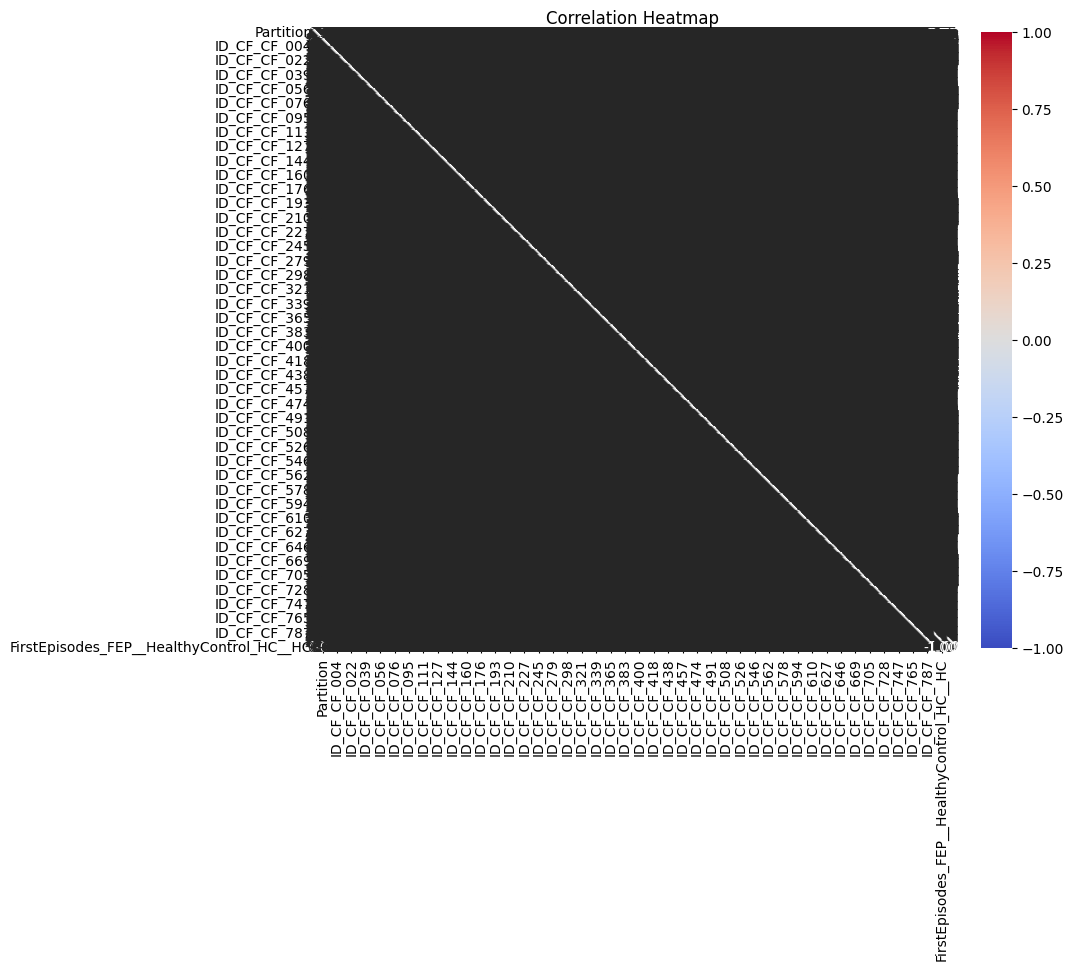

In [ ]:
# Convert categorical columns to numerical format
data_df_numeric = pd.get_dummies(data_df)

# Calculate the correlation matrix
correlation_matrix = data_df_numeric.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
print()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Updated

In [ ]:
BASE_DIR="E:\Data"
TRAIN_IMAGES_DIR=os.path.join(BASE_DIR,'train_images')

df=pd.read_excel("E:Classification_clean.xlsx")
df["Class"]=df["Diagnosis"]>0
#data_df["Class"].replace(True,2,inplace=True)
#data_df["Class"].replace(False,1,inplace=True)
df.Class = df.Class.astype('int')
imfolder = "E:\Data"

df.head()

,ID_CF,Partition,FirstEpisodes_FEP__HealthyControl_HC_,Diagnosis,Gender,Age,Site 1,Site 2,Site 3,Site 4,Site 5,Site 6,Site 7,Euler,Class
0,CF_001,4,FEP,3,0,23.857632,0,0,0,0,0,0,0,-21,1
1,CF_002,5,FEP,3,0,28.952772,0,0,0,0,0,0,0,-33,1
2,CF_003,7,FEP,1,0,20.199863,0,0,0,0,0,0,0,-55,1
3,CF_004,6,FEP,1,0,28.517454,0,0,0,0,0,0,0,-26,1
4,CF_005,8,FEP,2,1,39.101985,0,0,0,0,0,0,0,-24,1


In [ ]:
class Dataset(Dataset):
    def __init__(self, df: pd.DataFrame, imfolder: str, train: bool = True, transforms=None):
        self.df = df
        self.imfolder = imfolder
        self.train = train
        self.transforms = transforms

        # Filter out records with missing files or empty files
        self.df = self.df[self.df['ID_CF'].apply(lambda x: os.path.exists(os.path.join(imfolder, f'w{x}_MRI_sMRI_{x}_brain.nii.gz'))
                                                  and os.path.getsize(os.path.join(imfolder, f'w{x}_MRI_sMRI_{x}_brain.nii.gz')) > 0)]

        self.num_records_left = len(self.df)  # Number of records left in the dataset

    def __getitem__(self, index):
        filename = f'w{self.df.iloc[index]["ID_CF"]}_MRI_sMRI_{self.df.iloc[index]["ID_CF"]}_brain.nii.gz'
        im_path = os.path.join(self.imfolder, filename)

        # Check if file exists and is non-empty
        if os.path.exists(im_path) and os.path.getsize(im_path) > 0:
            nimg = nb.load(im_path)
            x = np.array(nimg.dataobj)
            x = transforms.ToTensor()(x)
            x = x.unsqueeze(0).type(torch.FloatTensor)
            m = torch.mean(x)
            s = torch.std(x)
            x = (x - m) / s

            if self.train:
                y = self.df.iloc[index]['Class']
                return x, y
            else:
                return x
        else:
            # Handle empty file, return None or some placeholder data
            return None

    def __len__(self):
        return len(self.df)

    def num_records_remaining(self):
        return self.num_records_left


In [ ]:
# Create Dataset object
dataset = Dataset(df, imfolder)

# Print the number of records left
print("Number of records remaining:", dataset.num_records_remaining())


Number of records remaining: 664


In [ ]:
train, valid = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df.Class.values
)



# reset index on both dataframes
train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)

train_targets = train.Class.values

# targets for validation
valid_targets = valid.Class.values

train_dataset=Milano_MRI_Dataset(
    df=train,
    imfolder=BASE_DIR,
    train=True,
    transforms=None
)

valid_dataset=Milano_MRI_Dataset(
    df=valid,
    imfolder=BASE_DIR,
    train=True,
    transforms=None
)

train_loader = DataLoader(
    train_dataset,
    batch_size=15,
    #num_workers=4,
    shuffle=True,
)

valid_loader = DataLoader(
    valid_dataset,
    batch_size=15,
    #num_workers=4,
    shuffle=False,
)

In [ ]:
import torch
import torch.nn as nn
import math
from functools import partial
from torch.autograd import Variable

import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

import time
import datetime
import copy

In [ ]:
class Simple3DCNN(nn.Module):

    def __init__(self, num_classes):


        super(Simple3DCNN, self).__init__()

        self.conv_layer1 = self._make_conv_layer(1, 32)
        self.conv_layer2 = self._make_conv_layer(32, 64)
        self.conv_layer3 = self._make_conv_layer(64, 128)
        self.conv_layer4 = self._make_conv_layer(128, 256)
        self.conv_layer5=nn.Conv3d(256, 2048, kernel_size=(4, 4, 5), padding=0)

        self.fc5 = nn.Linear(2048, 512)
        self.relu = nn.LeakyReLU()
        self.batch0=nn.BatchNorm1d(512)
        self.drop=nn.Dropout(p=0.25)
        self.fc6 = nn.Linear(512, 256)
        self.relu = nn.LeakyReLU()
        self.batch1=nn.BatchNorm1d(256)

        self.drop=nn.Dropout(p=0.25)
        self.fc7 = nn.Linear(256, num_classes)

    def _make_conv_layer(self, in_c, out_c):
        conv_layer = nn.Sequential(
        nn.Conv3d(in_c, out_c, kernel_size=3, padding=1),
        nn.LeakyReLU(),
        #nn.Conv3d(out_c, out_c, kernel_size=3, padding=1),
        #nn.LeakyReLU(),
        nn.BatchNorm3d(out_c),
        nn.MaxPool3d(kernel_size=2, stride=2),
        )
        return conv_layer

    def forward(self, x):
        #print(x.size())
        x = self.conv_layer1(x)
        #print(x.size())
        x = self.conv_layer2(x)
        #print(x.size())
        x = self.conv_layer3(x)
        #print(x.size())
        x = self.conv_layer4(x)
        #print(x.size())
        x=self.conv_layer5(x)
        #print(x.size())
        x = x.view(x.size(0), -1)
        #print(x.size())
        x = self.fc5(x)
        x = self.relu(x)
        #print(x.size())
        x = self.batch0(x)
        x = self.drop(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.batch1(x)
        x = self.drop(x)
        x = self.fc7(x)

        return x#,x1
model = Simple3DCNN(2)

In [ ]:
model = Simple3DCNN(2)

In [ ]:
tmp=next(iter(train_loader))
out=model(tmp[0])

In [ ]:
def train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device):

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs-1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0.0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels=labels.to(device)

                # Zero out the grads
                optimizer.zero_grad()

                # Forward
                # Track history in train mode
                with torch.set_grad_enabled(phase == 'train'):
                    model=model.to(device)
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    #loss = criterion(outputs, labels.type(torch.LongTensor).unsqueeze(1).to(device))
                    loss = criterion(outputs, labels.type(torch.LongTensor).to(device))

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # Statistics
                running_loss += loss.item()*inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss/len(datasets[phase])
            epoch_acc = running_corrects.double()/len(datasets[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time()-since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [ ]:
class_sample_count = np.array([len(np.where(train_targets == t)[0]) for t in np.unique(train_targets)])
weight = 1. / class_sample_count
class_weight=torch.from_numpy(weight)
class_weight=class_weight.max()/class_weight
class_weight=class_weight/class_weight.max()
class_weight=class_weight.type(torch.FloatTensor)
print(class_weight)

tensor([1.0000, 0.4931])


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datasets={'train':train_dataset,'valid':valid_dataset}
dataloaders={'train':train_loader,'valid':valid_loader}

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

criterion=nn.CrossEntropyLoss()
#criterion=nn.BCEWithLogitsLoss()

num_epochs=2

trained_model=train_model(datasets,dataloaders,model,criterion,optimizer,scheduler,num_epochs,device)


Epoch 0/1
----------
train Loss: 0.7434 Acc: 0.5460
valid Loss: 0.6374 Acc: 0.6641

Epoch 1/1
----------
train Loss: 0.7187 Acc: 0.5610
valid Loss: 0.6825 Acc: 0.5878

Training complete in 9m 4s
Best val Acc: 0.664122


tensor([1.0000, 0.4931])
Epoch 0/1
----------
train Loss: 0.7128 Acc: 0.5985
valid Loss: 0.6632 Acc: 0.6183

Epoch 1/1
----------
train Loss: 0.6201 Acc: 0.6660
valid Loss: 0.6334 Acc: 0.6260

Training complete in 8m 30s
Best val Acc: 0.625954


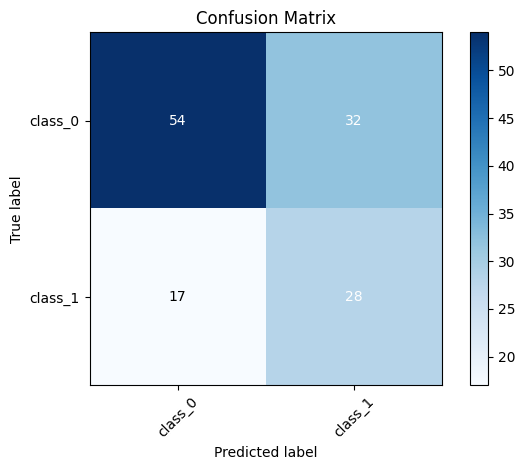

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import copy
import time

class_sample_count = np.array([len(np.where(train_targets == t)[0]) for t in np.unique(train_targets)])
weight = 1. / class_sample_count
class_weight = torch.from_numpy(weight)
class_weight = class_weight.max() / class_weight
class_weight = class_weight / class_weight.max()
class_weight = class_weight.type(torch.FloatTensor)
print(class_weight)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datasets = {'train': train_dataset, 'valid': valid_dataset}
dataloaders = {'train': train_loader, 'valid': valid_loader}

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

criterion = nn.CrossEntropyLoss()

num_epochs = 2

def train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device):

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs-1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0.0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels=labels.to(device)

                # Zero out the grads
                optimizer.zero_grad()

                # Forward
                # Track history in train mode
                with torch.set_grad_enabled(phase == 'train'):
                    model=model.to(device)
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels.type(torch.LongTensor).to(device))

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item()*inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(datasets[phase])
            epoch_acc = running_corrects.double() / len(datasets[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time()-since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Train the model
trained_model = train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device)

# Get predictions for the validation set
valid_predictions = []
valid_targets = []
for inputs, labels in dataloaders['valid']:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = trained_model(inputs)
    _, preds = torch.max(outputs, 1)
    valid_predictions.extend(preds.cpu().numpy())
    valid_targets.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(valid_targets, valid_predictions)
# Plot confusion matrix
plot_confusion_matrix(cm, classes=['class_0', 'class_1'], title='Confusion Matrix')

plt.show()


In [ ]:
def train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device):

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs-1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0.0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels=labels.to(device)

                # Zero out the grads
                optimizer.zero_grad()

                # Forward
                # Track history in train mode
                with torch.set_grad_enabled(phase == 'train'):
                    model=model.to(device)
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    #loss = criterion(outputs, labels.type(torch.LongTensor).unsqueeze(1).to(device))
                    loss = criterion(outputs, labels.type(torch.LongTensor).to(device))

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # Statistics
                running_loss += loss.item()*inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss/len(datasets[phase])
            epoch_acc = running_corrects.double()/len(datasets[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time()-since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

class_sample_count = np.array([len(np.where(train_targets == t)[0]) for t in np.unique(train_targets)])
weight = 1. / class_sample_count
class_weight=torch.from_numpy(weight)
class_weight=class_weight.max()/class_weight
class_weight=class_weight/class_weight.max()
class_weight=class_weight.type(torch.FloatTensor)
print(class_weight)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datasets={'train':train_dataset,'valid':valid_dataset}
dataloaders={'train':train_loader,'valid':valid_loader}

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

criterion=nn.CrossEntropyLoss()
#criterion=nn.BCEWithLogitsLoss()

num_epochs=10

trained_model=train_model(datasets,dataloaders,model,criterion,optimizer,scheduler,num_epochs,device)


tensor([1.0000, 0.4931])
Epoch 0/9
----------
train Loss: 0.7821 Acc: 0.5009
valid Loss: 0.6695 Acc: 0.5878

Epoch 1/9
----------
train Loss: 0.7305 Acc: 0.5610
valid Loss: 0.6594 Acc: 0.6031

Epoch 2/9
----------
train Loss: 0.6892 Acc: 0.6135
valid Loss: 0.6463 Acc: 0.6336

Epoch 3/9
----------
train Loss: 0.6686 Acc: 0.6229
valid Loss: 0.6660 Acc: 0.6336

Epoch 4/9
----------
train Loss: 0.6255 Acc: 0.6492
valid Loss: 0.6300 Acc: 0.6489

Epoch 5/9
----------
train Loss: 0.6137 Acc: 0.7054
valid Loss: 0.6174 Acc: 0.6794

Epoch 6/9
----------
train Loss: 0.5610 Acc: 0.6848
valid Loss: 0.6182 Acc: 0.6641

Epoch 7/9
----------
train Loss: 0.5301 Acc: 0.7355
valid Loss: 0.6278 Acc: 0.6718

Epoch 8/9
----------
train Loss: 0.5266 Acc: 0.7430
valid Loss: 0.6400 Acc: 0.6336

Epoch 9/9
----------
train Loss: 0.4999 Acc: 0.7692
valid Loss: 0.6119 Acc: 0.6565

Training complete in 40m 25s
Best val Acc: 0.679389


tensor([1.0000, 0.4931])
Epoch 0/1
----------
train Loss: 0.7325 Acc: 0.5610
valid Loss: 0.6320 Acc: 0.6718

Epoch 1/1
----------
train Loss: 0.6917 Acc: 0.6191
valid Loss: 0.7121 Acc: 0.5878

Training complete in 8m 57s
Best val Acc: 0.671756


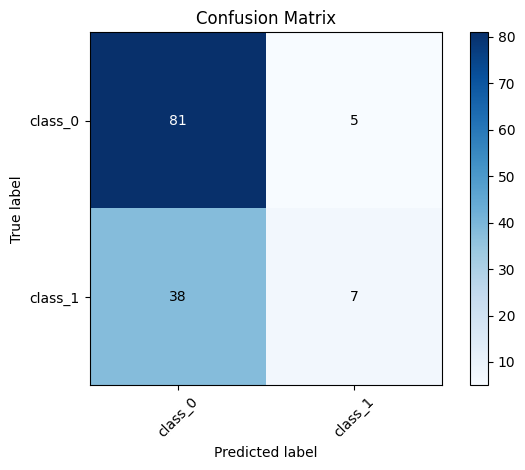

In [ ]:
class Simple3DCNN(nn.Module):

    def __init__(self, num_classes):


        super(Simple3DCNN, self).__init__()

        self.conv_layer1 = self._make_conv_layer(1, 32)
        self.conv_layer2 = self._make_conv_layer(32, 64)
        self.conv_layer3 = self._make_conv_layer(64, 128)
        self.conv_layer4 = self._make_conv_layer(128, 256)
        self.conv_layer5=nn.Conv3d(256, 2048, kernel_size=(4, 4, 5), padding=0)

        self.fc5 = nn.Linear(2048, 512)
        self.relu = nn.LeakyReLU()
        self.batch0=nn.BatchNorm1d(512)
        self.drop=nn.Dropout(p=0.25)
        self.fc6 = nn.Linear(512, 256)
        self.relu = nn.LeakyReLU()
        self.batch1=nn.BatchNorm1d(256)

        self.drop=nn.Dropout(p=0.25)
        self.fc7 = nn.Linear(256, num_classes)

    def _make_conv_layer(self, in_c, out_c):
        conv_layer = nn.Sequential(
        nn.Conv3d(in_c, out_c, kernel_size=3, padding=1),
        nn.LeakyReLU(),
        #nn.Conv3d(out_c, out_c, kernel_size=3, padding=1),
        #nn.LeakyReLU(),
        nn.BatchNorm3d(out_c),
        nn.MaxPool3d(kernel_size=2, stride=2),
        )
        return conv_layer

    def forward(self, x):
        #print(x.size())
        x = self.conv_layer1(x)
        #print(x.size())
        x = self.conv_layer2(x)
        #print(x.size())
        x = self.conv_layer3(x)
        #print(x.size())
        x = self.conv_layer4(x)
        #print(x.size())
        x=self.conv_layer5(x)
        #print(x.size())
        x = x.view(x.size(0), -1)
        #print(x.size())
        x = self.fc5(x)
        x = self.relu(x)
        #print(x.size())
        x = self.batch0(x)
        x = self.drop(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.batch1(x)
        x = self.drop(x)
        x = self.fc7(x)

        return x#,x1
model = Simple3DCNN(2)

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import copy
import time

class_sample_count = np.array([len(np.where(train_targets == t)[0]) for t in np.unique(train_targets)])
weight = 1. / class_sample_count
class_weight = torch.from_numpy(weight)
class_weight = class_weight.max() / class_weight
class_weight = class_weight / class_weight.max()
class_weight = class_weight.type(torch.FloatTensor)
print(class_weight)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datasets = {'train': train_dataset, 'valid': valid_dataset}
dataloaders = {'train': train_loader, 'valid': valid_loader}

# Define the optimizer with the desired parameters
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=0.001)

# Adjust the step size for the scheduler for training only 10 epochs
step_size = 10  # Adjust this as needed based on your preference
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.1)

criterion = nn.CrossEntropyLoss()

num_epochs = 2

def train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device):

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs-1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0.0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels=labels.to(device)

                # Zero out the grads
                optimizer.zero_grad()

                # Forward
                # Track history in train mode
                with torch.set_grad_enabled(phase == 'train'):
                    model=model.to(device)
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels.type(torch.LongTensor).to(device))

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item()*inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(datasets[phase])
            epoch_acc = running_corrects.double() / len(datasets[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time()-since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Train the model
trained_model = train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device)

# Get predictions for the validation set
valid_predictions = []
valid_targets = []
for inputs, labels in dataloaders['valid']:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = trained_model(inputs)
    _, preds = torch.max(outputs, 1)
    valid_predictions.extend(preds.cpu().numpy())
    valid_targets.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(valid_targets, valid_predictions)
# Plot confusion matrix
plot_confusion_matrix(cm, classes=['class_0', 'class_1'], title='Confusion Matrix')

plt.show()


tensor([1.0000, 0.4931])
Epoch 0/9
----------
train Loss: 0.7672 Acc: 0.5366
valid Loss: 0.9085 Acc: 0.3435

Epoch 1/9
----------
train Loss: 0.6871 Acc: 0.5872
valid Loss: 0.6860 Acc: 0.6336

Epoch 2/9
----------
train Loss: 0.6519 Acc: 0.6229
valid Loss: 0.6901 Acc: 0.6107

Epoch 3/9
----------
train Loss: 0.5973 Acc: 0.6867
valid Loss: 0.6591 Acc: 0.6183

Epoch 4/9
----------
train Loss: 0.5971 Acc: 0.6979
valid Loss: 0.6816 Acc: 0.6336

Epoch 5/9
----------
train Loss: 0.5539 Acc: 0.7129
valid Loss: 0.6605 Acc: 0.5954

Epoch 6/9
----------
train Loss: 0.5245 Acc: 0.7430
valid Loss: 0.6410 Acc: 0.6489

Epoch 7/9
----------
train Loss: 0.5358 Acc: 0.7430
valid Loss: 0.6519 Acc: 0.6336

Epoch 8/9
----------
train Loss: 0.4861 Acc: 0.7636
valid Loss: 0.6689 Acc: 0.6489

Epoch 9/9
----------
train Loss: 0.4655 Acc: 0.7692
valid Loss: 0.7159 Acc: 0.6183

Training complete in 39m 15s
Best val Acc: 0.648855


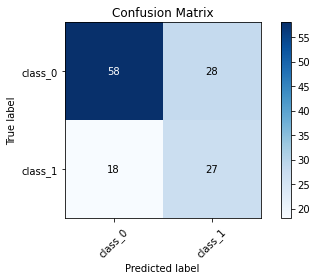

In [ ]:
class Simple3DCNN(nn.Module):

    def __init__(self, num_classes):


        super(Simple3DCNN, self).__init__()

        self.conv_layer1 = self._make_conv_layer(1, 32)
        self.conv_layer2 = self._make_conv_layer(32, 64)
        self.conv_layer3 = self._make_conv_layer(64, 128)
        self.conv_layer4 = self._make_conv_layer(128, 256)
        self.conv_layer5=nn.Conv3d(256, 2048, kernel_size=(4, 4, 5), padding=0)

        self.fc5 = nn.Linear(2048, 512)
        self.relu = nn.LeakyReLU()
        self.batch0=nn.BatchNorm1d(512)
        self.drop=nn.Dropout(p=0.25)
        self.fc6 = nn.Linear(512, 256)
        self.relu = nn.LeakyReLU()
        self.batch1=nn.BatchNorm1d(256)

        self.drop=nn.Dropout(p=0.25)
        self.fc7 = nn.Linear(256, num_classes)

    def _make_conv_layer(self, in_c, out_c):
        conv_layer = nn.Sequential(
        nn.Conv3d(in_c, out_c, kernel_size=3, padding=1),
        nn.LeakyReLU(),
        #nn.Conv3d(out_c, out_c, kernel_size=3, padding=1),
        #nn.LeakyReLU(),
        nn.BatchNorm3d(out_c),
        nn.MaxPool3d(kernel_size=2, stride=2),
        )
        return conv_layer

    def forward(self, x):
        #print(x.size())
        x = self.conv_layer1(x)
        #print(x.size())
        x = self.conv_layer2(x)
        #print(x.size())
        x = self.conv_layer3(x)
        #print(x.size())
        x = self.conv_layer4(x)
        #print(x.size())
        x=self.conv_layer5(x)
        #print(x.size())
        x = x.view(x.size(0), -1)
        #print(x.size())
        x = self.fc5(x)
        x = self.relu(x)
        #print(x.size())
        x = self.batch0(x)
        x = self.drop(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.batch1(x)
        x = self.drop(x)
        x = self.fc7(x)

        return x#,x1
model = Simple3DCNN(2)

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import copy
import time

class_sample_count = np.array([len(np.where(train_targets == t)[0]) for t in np.unique(train_targets)])
weight = 1. / class_sample_count
class_weight = torch.from_numpy(weight)
class_weight = class_weight.max() / class_weight
class_weight = class_weight / class_weight.max()
class_weight = class_weight.type(torch.FloatTensor)
print(class_weight)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datasets = {'train': train_dataset, 'valid': valid_dataset}
dataloaders = {'train': train_loader, 'valid': valid_loader}

# Define the optimizer with the desired parameters
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=0.001)

# Adjust the step size for the scheduler for training only 10 epochs
step_size = 10  # Adjust this as needed based on your preference
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.1)

criterion = nn.CrossEntropyLoss()

num_epochs = 10

def train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device):

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs-1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0.0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels=labels.to(device)

                # Zero out the grads
                optimizer.zero_grad()

                # Forward
                # Track history in train mode
                with torch.set_grad_enabled(phase == 'train'):
                    model=model.to(device)
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels.type(torch.LongTensor).to(device))

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item()*inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(datasets[phase])
            epoch_acc = running_corrects.double() / len(datasets[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time()-since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Train the model
trained_model = train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device)

# Get predictions for the validation set
valid_predictions = []
valid_targets = []
for inputs, labels in dataloaders['valid']:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = trained_model(inputs)
    _, preds = torch.max(outputs, 1)
    valid_predictions.extend(preds.cpu().numpy())
    valid_targets.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(valid_targets, valid_predictions)
# Plot confusion matrix
plot_confusion_matrix(cm, classes=['class_0', 'class_1'], title='Confusion Matrix')

plt.show()


tensor([1.0000, 0.4931])
Epoch 0/9
----------
train Loss: 0.6969 Acc: 0.4409
valid Loss: 0.6895 Acc: 0.6565

Epoch 1/9
----------
train Loss: 0.6900 Acc: 0.5760
valid Loss: 0.6837 Acc: 0.6565

Epoch 2/9
----------
train Loss: 0.6839 Acc: 0.6341
valid Loss: 0.6781 Acc: 0.6565

Epoch 3/9
----------
train Loss: 0.6774 Acc: 0.6698
valid Loss: 0.6726 Acc: 0.6565

Epoch 4/9
----------
train Loss: 0.6712 Acc: 0.6660
valid Loss: 0.6674 Acc: 0.6565

Epoch 5/9
----------
train Loss: 0.6633 Acc: 0.6660
valid Loss: 0.6618 Acc: 0.6565

Epoch 6/9
----------
train Loss: 0.6593 Acc: 0.6660
valid Loss: 0.6566 Acc: 0.6565

Epoch 7/9
----------
train Loss: 0.6548 Acc: 0.6660
valid Loss: 0.6528 Acc: 0.6565

Epoch 8/9
----------
train Loss: 0.6481 Acc: 0.6660
valid Loss: 0.6494 Acc: 0.6565

Epoch 9/9
----------
train Loss: 0.6436 Acc: 0.6660
valid Loss: 0.6476 Acc: 0.6565

Training complete in 18m 4s
Best val Acc: 0.656489


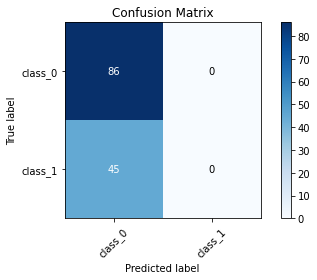

In [ ]:
class AlexNet_3D(nn.Module):

    def __init__(self, num_classes):
        super(AlexNet_3D, self).__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv3d(1, 144, kernel_size=5, stride=2),
            nn.LeakyReLU(),
            nn.MaxPool3d(kernel_size=3, stride=2),
        )

        self.conv_layer2 = nn.Sequential(
            nn.Conv3d(144, 192, kernel_size=3, stride=1),
            nn.LeakyReLU(),
            nn.MaxPool3d(kernel_size=3, stride=2),
        )

        self.conv_layer3 = nn.Sequential(
            nn.Conv3d(192, 192, kernel_size=3, stride=1),
            nn.LeakyReLU(),
            nn.MaxPool3d(kernel_size=3, stride=2),
            nn.Dropout(p=0.4)
        )

        self.fc1 = nn.Linear(2304, 374)
        self.relu1 = nn.LeakyReLU()
        self.dropout = nn.Dropout(p=0.4)

        self.fc2 = nn.Linear(374, 192)
        self.relu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(192, num_classes)

    def forward(self, x):
        x = self.conv_layer1(x)
        x = self.conv_layer2(x)
        x = self.conv_layer3(x)

        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)

        return x

model = AlexNet_3D(2)

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import copy
import time

class_sample_count = np.array([len(np.where(train_targets == t)[0]) for t in np.unique(train_targets)])
weight = 1. / class_sample_count
class_weight = torch.from_numpy(weight)
class_weight = class_weight.max() / class_weight
class_weight = class_weight / class_weight.max()
class_weight = class_weight.type(torch.FloatTensor)
print(class_weight)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datasets = {'train': train_dataset, 'valid': valid_dataset}
dataloaders = {'train': train_loader, 'valid': valid_loader}

# Define the optimizer with the desired parameters
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=0.001)

# Adjust the step size for the scheduler for training only 10 epochs
step_size = 10  # Adjust this as needed based on your preference
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.1)


criterion = nn.CrossEntropyLoss()

num_epochs = 10

def train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device):

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs-1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0.0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels=labels.to(device)

                # Zero out the grads
                optimizer.zero_grad()

                # Forward
                # Track history in train mode
                with torch.set_grad_enabled(phase == 'train'):
                    model=model.to(device)
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels.type(torch.LongTensor).to(device))

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item()*inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(datasets[phase])
            epoch_acc = running_corrects.double() / len(datasets[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time()-since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Train the model
trained_model = train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device)

# Get predictions for the validation set
valid_predictions = []
valid_targets = []
for inputs, labels in dataloaders['valid']:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = trained_model(inputs)
    _, preds = torch.max(outputs, 1)
    valid_predictions.extend(preds.cpu().numpy())
    valid_targets.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(valid_targets, valid_predictions)
# Plot confusion matrix
plot_confusion_matrix(cm, classes=['class_0', 'class_1'], title='Confusion Matrix')

plt.show()



tensor([1.0000, 0.4931])
Epoch 0/9
----------
train Loss: 0.7171 Acc: 0.3340
valid Loss: 0.7159 Acc: 0.3435

Epoch 1/9
----------
train Loss: 0.7170 Acc: 0.3340
valid Loss: 0.7158 Acc: 0.3435

Epoch 2/9
----------
train Loss: 0.7167 Acc: 0.3340
valid Loss: 0.7154 Acc: 0.3435

Epoch 3/9
----------
train Loss: 0.7166 Acc: 0.3340
valid Loss: 0.7149 Acc: 0.3435

Epoch 4/9
----------
train Loss: 0.7163 Acc: 0.3340
valid Loss: 0.7145 Acc: 0.3435

Epoch 5/9
----------
train Loss: 0.7161 Acc: 0.3340
valid Loss: 0.7147 Acc: 0.3435

Epoch 6/9
----------
train Loss: 0.7158 Acc: 0.3340
valid Loss: 0.7147 Acc: 0.3435

Epoch 7/9
----------
train Loss: 0.7155 Acc: 0.3340
valid Loss: 0.7144 Acc: 0.3435

Epoch 8/9
----------
train Loss: 0.7153 Acc: 0.3340
valid Loss: 0.7143 Acc: 0.3435

Epoch 9/9
----------
train Loss: 0.7151 Acc: 0.3340
valid Loss: 0.7139 Acc: 0.3435

Training complete in 22m 31s
Best val Acc: 0.343511


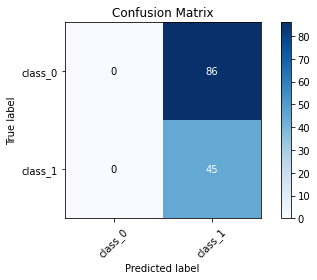

In [ ]:
class VoxCNN(nn.Module):

    def __init__(self, num_classes):


        super(VoxCNN, self).__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv3d(1, 8, kernel_size=3, stride=1,padding=1),
            nn.LeakyReLU(),
            nn.Conv3d(8, 8, kernel_size=3, stride=1,padding=1),
            nn.LeakyReLU(),
            nn.MaxPool3d(kernel_size=2, stride=2),
            #nn.BatchNorm3d(16),
            )

        self.conv_layer2 = nn.Sequential(
            nn.Conv3d(8, 16, kernel_size=3, stride=1,padding=1),
            nn.LeakyReLU(),
            nn.Conv3d(16, 16, kernel_size=3, stride=1,padding=1),
            nn.LeakyReLU(),
            nn.MaxPool3d(kernel_size=2, stride=2),
            #nn.BatchNorm3d(32),
            )


        self.conv_layer3 = nn.Sequential(
            nn.Conv3d(16, 32, kernel_size=3, stride=1,padding=1),
            nn.LeakyReLU(),
            nn.Conv3d(32, 32, kernel_size=3, stride=1,padding=1),
            nn.LeakyReLU(),
            nn.Conv3d(32, 32, kernel_size=3, stride=1,padding=1),
            nn.LeakyReLU(),
            nn.MaxPool3d(kernel_size=2, stride=2),
            #nn.BatchNorm3d(32),
            )

        self.conv_layer4 = nn.Sequential(
            nn.Conv3d(32, 64, kernel_size=3, stride=1,padding=1),
            nn.LeakyReLU(),
            nn.Conv3d(64, 64, kernel_size=3, stride=1,padding=1),
            nn.LeakyReLU(),
            nn.Conv3d(64, 64, kernel_size=3, stride=1,padding=1),
            nn.LeakyReLU(),
            nn.MaxPool3d(kernel_size=2, stride=2),
            )

        self.class_layer = nn.Sequential(
            nn.Linear(5120, 128),
            nn.LeakyReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(p=0.7),
            nn.Linear(128, 64),
            nn.Linear(64, num_classes),
            )


    def forward(self, x):
        #print(x.size())
        x = self.conv_layer1(x)
        #print(x.size())
        x = self.conv_layer2(x)
        #print(x.size())
        x = self.conv_layer3(x)
        #print(x.size())
        x = self.conv_layer4(x)
        #print(x.size())

        x = x.view(x.size(0), -1)
        #print(x.size())

        x = self.class_layer(x)

        return x#,x1

model = VoxCNN(2)


import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import copy
import time

class_sample_count = np.array([len(np.where(train_targets == t)[0]) for t in np.unique(train_targets)])
weight = 1. / class_sample_count
class_weight = torch.from_numpy(weight)
class_weight = class_weight.max() / class_weight
class_weight = class_weight / class_weight.max()
class_weight = class_weight.type(torch.FloatTensor)
print(class_weight)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datasets = {'train': train_dataset, 'valid': valid_dataset}
dataloaders = {'train': train_loader, 'valid': valid_loader}

# Define the optimizer with the desired parameters
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=0.001)

# Adjust the step size for the scheduler for training only 10 epochs
step_size = 10  # Adjust this as needed based on your preference
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.1)


criterion = nn.CrossEntropyLoss()

num_epochs = 10

def train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device):

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs-1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0.0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels=labels.to(device)

                # Zero out the grads
                optimizer.zero_grad()

                # Forward
                # Track history in train mode
                with torch.set_grad_enabled(phase == 'train'):
                    model=model.to(device)
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels.type(torch.LongTensor).to(device))

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item()*inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(datasets[phase])
            epoch_acc = running_corrects.double() / len(datasets[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time()-since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Train the model
trained_model = train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device)

# Get predictions for the validation set
valid_predictions = []
valid_targets = []
for inputs, labels in dataloaders['valid']:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = trained_model(inputs)
    _, preds = torch.max(outputs, 1)
    valid_predictions.extend(preds.cpu().numpy())
    valid_targets.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(valid_targets, valid_predictions)
# Plot confusion matrix
plot_confusion_matrix(cm, classes=['class_0', 'class_1'], title='Confusion Matrix')

plt.show()


In [ ]:

class VoxResNet21(nn.Module):

    def __init__(self, num_classes):


        super(VoxResNet21, self).__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv3d(1, 32, kernel_size=3, stride=1,padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm3d(32),
            nn.Conv3d(32, 32, kernel_size=3, stride=1,padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm3d(32),
            nn.Conv3d(32, 64, kernel_size=3, stride=2,padding=1),
            )

        self.res_layer2 = self._make_res_layer(64,1)
        self.res_layer3 = self._make_res_layer(64,1)
        self.bridge_layer4 = self._make_bridge_layer(64,64,1)

        self.res_layer5 = self._make_res_layer(64,1)
        self.res_layer6 = self._make_res_layer(64,1)
        self.bridge_layer7 = self._make_bridge_layer(64,128,1)

        self.res_layer8 = self._make_res_layer(128,1)
        self.res_layer9 = self._make_res_layer(128,1)

        self.pool = nn.MaxPool3d(kernel_size=7, stride=7)

        self.class_layer = nn.Sequential(
            #nn.MaxPool3d(kernel_size=7, stride=7),
            #nn.flatten(),
            nn.Linear(128, 128),
            nn.LeakyReLU(),
            nn.Linear(128, num_classes),
            )

    def _make_res_layer(self, in_c, pad):
        res_layer = nn.Sequential(
            nn.LeakyReLU(),
            nn.BatchNorm3d(in_c),
            nn.Conv3d(in_c, in_c, kernel_size=3, stride=1,padding=pad),
            nn.LeakyReLU(),
            nn.BatchNorm3d(in_c),
            nn.Conv3d(in_c, in_c, kernel_size=3, stride=1,padding=pad),
        )
        return res_layer

    def _make_bridge_layer(self, in_c, out_c, pad):
        bridge_layer = nn.Sequential(
            nn.LeakyReLU(),
            nn.BatchNorm3d(in_c),
            nn.Conv3d(in_c, out_c, kernel_size=3, stride=2,padding=pad),
        )
        return bridge_layer

    def forward(self, x):
        #print(x.size())
        x = self.conv_layer1(x)
        #print(x.size())

        x_res = self.res_layer2(x)
        x=x+x_res

        x_res = self.res_layer3(x)
        x=x+x_res

        x=self.bridge_layer4(x)

        x_res = self.res_layer5(x)
        x=x+x_res

        x_res = self.res_layer6(x)
        x=x+x_res

        x=self.bridge_layer7(x)

        x_res = self.res_layer8(x)
        x=x+x_res

        x_res = self.res_layer8(x)
        x=x+x_res

        x=self.pool(x)
        x = x.view(x.size(0), -1)
        #print(x.size())

        x = self.class_layer(x)

        return x#,x1

model = VoxResNet21(2)


tensor([1.0000, 0.4931])
Epoch 0/0
----------
train Loss: 0.9459 Acc: 0.3340
valid Loss: 0.8100 Acc: 0.3435

Training complete in 19m 22s
Best val Acc: 0.343511


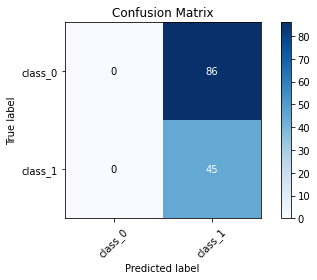

In [ ]:

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import copy
import time

class_sample_count = np.array([len(np.where(train_targets == t)[0]) for t in np.unique(train_targets)])
weight = 1. / class_sample_count
class_weight = torch.from_numpy(weight)
class_weight = class_weight.max() / class_weight
class_weight = class_weight / class_weight.max()
class_weight = class_weight.type(torch.FloatTensor)
print(class_weight)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datasets = {'train': train_dataset, 'valid': valid_dataset}
dataloaders = {'train': train_loader, 'valid': valid_loader}

# Define the optimizer with the desired parameters
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=0.001)

# Adjust the step size for the scheduler for training only 10 epochs
step_size = 10  # Adjust this as needed based on your preference
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.1)


criterion = nn.CrossEntropyLoss()

num_epochs = 1

def train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device):

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs-1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0.0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels=labels.to(device)

                # Zero out the grads
                optimizer.zero_grad()

                # Forward
                # Track history in train mode
                with torch.set_grad_enabled(phase == 'train'):
                    model=model.to(device)
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels.type(torch.LongTensor).to(device))

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item()*inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(datasets[phase])
            epoch_acc = running_corrects.double() / len(datasets[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time()-since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Train the model
trained_model = train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device)

# Get predictions for the validation set
valid_predictions = []
valid_targets = []
for inputs, labels in dataloaders['valid']:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = trained_model(inputs)
    _, preds = torch.max(outputs, 1)
    valid_predictions.extend(preds.cpu().numpy())
    valid_targets.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(valid_targets, valid_predictions)
# Plot confusion matrix
plot_confusion_matrix(cm, classes=['class_0', 'class_1'], title='Confusion Matrix')

plt.show()


Epoch 0/0
----------
train Loss: 0.8008 Acc: 0.5066

Training complete in 3m 38s
Best train Acc: 0.5066


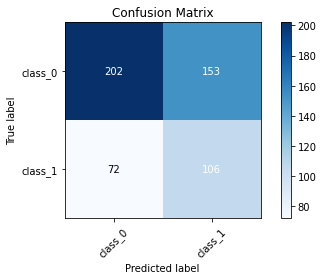

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import copy
import time

# Define the model class
class Simple3DCNN(nn.Module):
    def __init__(self, num_classes):
        super(Simple3DCNN, self).__init__()

        self.conv_layer1 = self._make_conv_layer(1, 32)
        self.conv_layer2 = self._make_conv_layer(32, 64)
        self.conv_layer3 = self._make_conv_layer(64, 128)
        self.conv_layer4 = self._make_conv_layer(128, 256)
        self.conv_layer5 = nn.Conv3d(256, 2048, kernel_size=(4, 4, 5), padding=0)

        self.fc5 = nn.Linear(2048, 512)
        self.relu = nn.LeakyReLU()
        self.batch0 = nn.BatchNorm1d(512)
        self.drop = nn.Dropout(p=0.25)
        self.fc6 = nn.Linear(512, 256)
        self.relu = nn.LeakyReLU()
        self.batch1 = nn.BatchNorm1d(256)

        self.drop = nn.Dropout(p=0.25)
        self.fc7 = nn.Linear(256, num_classes)

    def _make_conv_layer(self, in_c, out_c):
        conv_layer = nn.Sequential(
            nn.Conv3d(in_c, out_c, kernel_size=3, padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm3d(out_c),
            nn.MaxPool3d(kernel_size=2, stride=2),
        )
        return conv_layer

    def forward(self, x):
        x = self.conv_layer1(x)
        x = self.conv_layer2(x)
        x = self.conv_layer3(x)
        x = self.conv_layer4(x)
        x = self.conv_layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.batch0(x)
        x = self.drop(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.batch1(x)
        x = self.drop(x)
        x = self.fc7(x)
        return x

# Define other parameters
class_sample_count = np.array([len(np.where(train_targets == t)[0]) for t in np.unique(train_targets)])
weight = 1. / class_sample_count
class_weight = torch.from_numpy(weight)
class_weight = class_weight.max() / class_weight
class_weight = class_weight / class_weight.max()
class_weight = class_weight.type(torch.FloatTensor)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datasets = {'train': train_dataset}  # Remove 'valid' key
dataloaders = {'train': train_loader}

# Define the model
model = Simple3DCNN(2)

# Define the optimizer with the desired parameters
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=0.001)

# Adjust the step size for the scheduler for training only 10 epochs
step_size = 1  # Adjust this as needed based on your preference
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.1)

criterion = nn.CrossEntropyLoss()

num_epochs = 1

# Define functions for training and plotting confusion matrix
def train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs-1))
        print('-' * 10)

        for phase in ['train']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0.0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero out the grads
                optimizer.zero_grad()

                # Forward
                # Track history in train mode
                with torch.set_grad_enabled(phase == 'train'):
                    model = model.to(device)
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels.type(torch.LongTensor).to(device))

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(datasets[phase])
            epoch_acc = running_corrects.double() / len(datasets[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'train' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best train Acc: {:.4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Train the model
trained_model = train_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device)

# Get predictions for the entire dataset (including validation)
all_predictions = []
all_targets = []
for inputs, labels in dataloaders['train']:  # Use the train loader for the entire dataset
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = trained_model(inputs)
    _, preds = torch.max(outputs, 1)
    all_predictions.extend(preds.cpu().numpy())
    all_targets.extend(labels.cpu().numpy())

# Compute confusion matrix for the entire dataset
cm = confusion_matrix(all_targets, all_predictions)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=['class_0', 'class_1'], title='Confusion Matrix')

plt.show()
